[IPython "magic" commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html#built-in-magic-commands) are pretty handy in general.  
In particular, I often use `%time` and `%timeit` for rapid profiling of little code snippets, for example:

In [37]:
#| code-fold: true

import time
import random

import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

In [5]:
%timeit time.sleep(random.random())

The slowest run took 67.00 times longer than the fastest. This could mean that an intermediate result is being cached.
400 ms ± 347 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As the output shows, we get `mean ± std` across several runs (IPython will try to guesstimate how many runs are actually necessary, but you can change those parameters too).  
That does the job almost always.
But what if we want to get all run values?  
You can pass the parameter `-o` and that'll do!

In [27]:
times = %timeit -o -r 100 time.sleep(random.random())  # -r -> repeat R times the measurement

The slowest run took 111.58 times longer than the fastest. This could mean that an intermediate result is being cached.
497 ms ± 292 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


So we can do stuff with the output:

In [30]:
times.timings[:5]

[0.22056039492599666,
 0.23466998199000955,
 0.26134258206002414,
 0.8024904718622565,
 0.9086503440048546]

In [38]:
np.percentile(times.timings, .99)

0.014373812611727044

Or plotting them:

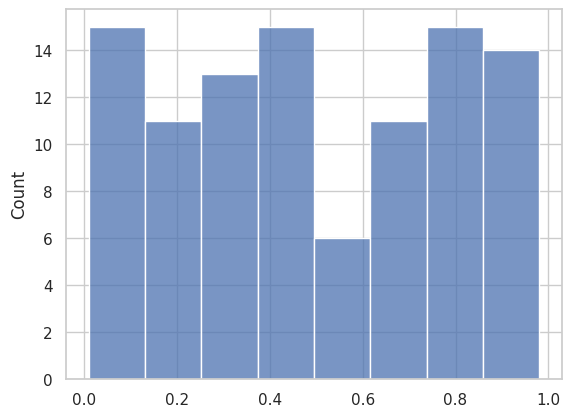

In [36]:
sns.histplot(times.timings);

Let's run the same thing, 10 loops each time (`-n`):

In [13]:
times = %timeit -o -n 10 time.sleep(random.random())

486 ms ± 85.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The output is in fact a proper object with some potentially useful attributes as well:

In [22]:
times

<TimeitResult : 486 ms ± 85.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [25]:
times.loops, times.worst, times.best, times.compile_time

(10, 0.6338168126065284, 0.37239220049232247, 0.00032199999999993345)

<div style="text-align: right; font-size: 40px; font-family: 'Inconsolata', monospace;">
  /Fin
</div>
    
<div style="font-family: 'Inconsolata', monospace;">
Any bugs, questions, comments, suggestions? Ping me on [twitter](https://www.twitter.com/fabridamicelli) or drop me an e-mail (fabridamicelli at gmail).  
Share this article on your favourite platform:
</div>